In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
books_df = pd.read_csv('data/books.csv',  encoding='latin-1')

In [3]:
books_df.head(10)

,Book-Title,Author-Name,Description,Level,Image-URL,ISBN,Ratings,Genres
0,Artificial Intelligence: A Modern Approach,Stuart Russell and Peter Norvig,The leading textbook on artificial intelligenc...,advanced,https://images-na.ssl-images-amazon.com/images...,137903952,4.1,AI
1,Deep Learning,"Ian Goodfellow, Yoshua Bengio, and Aaron Courv...","A comprehensive introduction to deep learning,...",intermediate,https://m.media-amazon.com/images/I/61qbj4Kwau...,262035618,4.5,AI
2,Artificial Intelligence: A Modern Approach 3rd...,Russell and Norvig,A shorter and more accessible introduction to ...,beginners,https://m.media-amazon.com/images/I/41HT2wMcAC...,136042597,0.0,AI
3,Neural Networks and Deep Learning,Michael Nielsen,Neural Networks and Deep Learning is a free on...,intermediate,https://coursesteach.com/pluginfile.php/4633/c...,1139495488,4.4,AI
4,Python Machine Learning - Second Edition: Mach...,"Sebastian Raschka, Vahid Mirjalili",A beginner's guide to machine learning with Py...,beginners,https://m.media-amazon.com/images/I/41hc+wT0F3...,9.78E+12,4.5,AI
5,Reinforcement Learning: An Introduction (Adapt...,Richard S. Sutton and Andrew G. Barto,"A classic textbook on reinforcement learning, ...",advanced,https://m.media-amazon.com/images/I/51-7xL6Utp...,262193981,3.0,AI
6,The Master Algorithm: How the Quest for the Ul...,Pedro Domingos,A popular science book that explores the histo...,beginners,https://images-na.ssl-images-amazon.com/images...,465065708,4.3,AI
7,Hands-On Machine Learning with Scikit-Learn an...,Aurélien Géron,A practical guide to machine learning using Py...,intermediate,https://m.media-amazon.com/images/I/51GcXOrWRO...,1492032646,2.3,AI
8,Machine Learning for Absolute Beginners,Oliver Theobald,A friendly introduction to machine learning fo...,beginners,https://m.media-amazon.com/images/I/41KnH6vqp0...,152095140X,4.2,AI
9,Introduction to Artificial Intelligence and Ex...,Dan W. Patterson,A comprehensive introduction to artificial int...,intermediate,https://m.media-amazon.com/images/I/417oWz7jjY...,134771001,4.4,AI


In [4]:
books_df.shape

(300, 8)

In [5]:
books_df.columns

Index(['Book-Title', 'Author-Name', 'Description', 'Level', 'Image-URL',
       'ISBN', 'Ratings', 'Genres'],
      dtype='object')

In [6]:
# Lets remane some wierd columns name
books_df.rename(columns={"Book-Title":'title',
                      "Author-Name":'author',
                     "Image-URL":"image_url",
                      "Description": "description",
                      "Level": "levels",
                     "Ratings":"ratings"},inplace=True)

In [7]:
books_df.head(5)

,title,author,description,levels,image_url,ISBN,ratings,Genres
0,Artificial Intelligence: A Modern Approach,Stuart Russell and Peter Norvig,The leading textbook on artificial intelligenc...,advanced,https://images-na.ssl-images-amazon.com/images...,137903952,4.1,AI
1,Deep Learning,"Ian Goodfellow, Yoshua Bengio, and Aaron Courv...","A comprehensive introduction to deep learning,...",intermediate,https://m.media-amazon.com/images/I/61qbj4Kwau...,262035618,4.5,AI
2,Artificial Intelligence: A Modern Approach 3rd...,Russell and Norvig,A shorter and more accessible introduction to ...,beginners,https://m.media-amazon.com/images/I/41HT2wMcAC...,136042597,0.0,AI
3,Neural Networks and Deep Learning,Michael Nielsen,Neural Networks and Deep Learning is a free on...,intermediate,https://coursesteach.com/pluginfile.php/4633/c...,1139495488,4.4,AI
4,Python Machine Learning - Second Edition: Mach...,"Sebastian Raschka, Vahid Mirjalili",A beginner's guide to machine learning with Py...,beginners,https://m.media-amazon.com/images/I/41hc+wT0F3...,9.78E+12,4.5,AI


In [8]:
books_df.isnull().sum()

title          0
author         0
description    1
levels         0
image_url      0
ISBN           0
ratings        0
Genres         0
dtype: int64

In [9]:
books_df.duplicated().sum()

0

In [10]:
# Subset the dataset with the specified columns
selected_columns = ['title', 'author', 'description', 'levels', 'image_url', 'ISBN', 'ratings']
books_subset = books_df[selected_columns]

In [11]:
# Display the first few rows of the dataset
print(books_subset.head())

                                               title  \
0         Artificial Intelligence: A Modern Approach   
1                                      Deep Learning   
2  Artificial Intelligence: A Modern Approach 3rd...   
3                  Neural Networks and Deep Learning   
4  Python Machine Learning - Second Edition: Mach...   

                                              author  \
0                    Stuart Russell and Peter Norvig   
1  Ian Goodfellow, Yoshua Bengio, and Aaron Courv...   
2                                 Russell and Norvig   
3                                    Michael Nielsen   
4                 Sebastian Raschka, Vahid Mirjalili   

                                         description        levels  \
0  The leading textbook on artificial intelligenc...      advanced   
1  A comprehensive introduction to deep learning,...  intermediate   
2  A shorter and more accessible introduction to ...     beginners   
3  Neural Networks and Deep Learning is a free

In [12]:
# Check the summary statistics of the dataset
print(books_subset.describe())

          ratings
count  300.000000
mean     3.566900
std      1.389951
min      0.000000
25%      3.275000
50%      4.000000
75%      4.500000
max      5.000000


In [13]:
# Count the number of missing values in each column
print(books_subset.isnull().sum())


title          0
author         0
description    1
levels         0
image_url      0
ISBN           0
ratings        0
dtype: int64


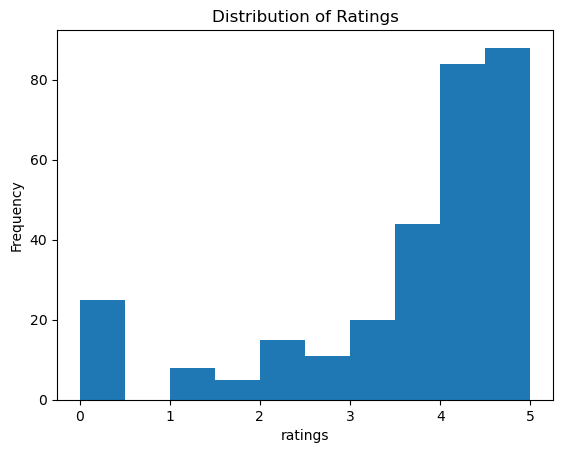

In [14]:
# Explore the distribution of ratings
import matplotlib.pyplot as plt
plt.hist(books_subset['ratings'])
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

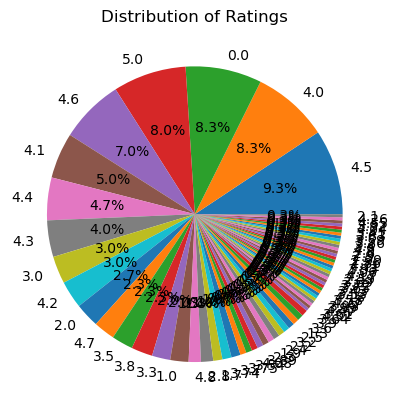

In [15]:
import matplotlib.pyplot as plt

# Calculate the frequency of each rating
rating_counts = books_subset['ratings'].value_counts()

# Create a pie chart
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Distribution of Ratings')

# Display the pie chart
plt.show()

In [16]:
#To find the book with the highest rating in the book dataset
highest_rated_book = books_subset[books_subset['ratings'] == books_subset['ratings'].max()]
#This code filters the books_subset DataFrame based on the condition books_subset['Ratings'] == books_subset['Ratings'].max(), which selects the rows where the 'Ratings' column has the maximum rating value. The resulting DataFrame, highest_rated_book, will contain the book(s) with the highest rating.


In [17]:
print(highest_rated_book)

                                                 title  \
10   AI Algorithms, Data Structures, and Idioms in ...   
63          Cybersecurity: What Everyone Needs to Know   
65   The Hardware Hacker: Adventures in Making and ...   
69                     Cyber Security in Organizations   
78          Metasploit: The Penetration Testers Guide   
79   Messing with the Enemy: Surviving in a Social ...   
84    Hacking Exposed 7: Network Security Secrets a...   
93        Enterprise Cybersecurity in Digital Business   
99                                    The Cuckoos Egg   
118  Data Science Ethics: Concepts Techniques and C...   
135  The Kaggle Book: Data analysis and machine lea...   
149  Designing Data-Intensive Applications: The Big...   
164  Advanced Machine Learning with Python: Solve d...   
177  Introducing HR Analytics with Machine Learning...   
184  Practicing Trustworthy Machine Learning: Consi...   
186  Bridging the AI Gap: Why some leaders create i...   
189  Python Da

In [18]:
highest_rated_book.head(10)

,title,author,description,levels,image_url,ISBN,ratings
10,"AI Algorithms, Data Structures, and Idioms in ...",George F. Luger and William A. Stubblefield,A comprehensive guide to artificial intelligen...,advanced,https://m.media-amazon.com/images/I/51vkYf0PSq...,136070477,5.0
63,Cybersecurity: What Everyone Needs to Know,"Peter W. Singer, Allan Friedman",Dependence on computers has had a transformati...,intermediate,https://m.media-amazon.com/images/I/51+YNUAkEe...,9.78E+12,5.0
65,The Hardware Hacker: Adventures in Making and ...,Andrew Bunnie Huang,"For over a decade, Andrew ""bunnie"" Huang, one ...",advanced,https://m.media-amazon.com/images/I/51L8sw3nZE...,159327758X,5.0
69,Cyber Security in Organizations,E. Fritzvold,The purpose of this book is to compare cyber s...,advanced,https://images-na.ssl-images-amazon.com/images...,154918974,5.0
78,Metasploit: The Penetration Testers Guide,"David Kennedy, Jim O'Gorman, Devon Kearns, Ma...","The book, quite famous amongst beginners, is w...",intermediate,https://m.media-amazon.com/images/I/51X+fMi346...,159327288X,5.0
79,Messing with the Enemy: Surviving in a Social ...,Clint Watts,Clint Watts electrified the nation when he tes...,intermediate,https://m.media-amazon.com/images/I/51UB8EjR23...,62795996,5.0
84,Hacking Exposed 7: Network Security Secrets a...,"George Kurtz, Joel Scambray, and Stuart McClure",Three cybersecurity specialists who have studi...,intermediate,https://m.media-amazon.com/images/I/51huRgIBJB...,71780289,5.0
93,Enterprise Cybersecurity in Digital Business,Ariel Evans,Cyber risk is the highest perceived business r...,advanced,https://m.media-amazon.com/images/I/51N3++Fr82...,367511495,5.0
99,The Cuckoos Egg,Cliff Stoll,"Clifford Stolls first book, The Cuckoos Eg...",advanced,https://m.media-amazon.com/images/I/51Iis55pxO...,1416507787,5.0
118,Data Science Ethics: Concepts Techniques and C...,David Martens,Data science ethics is all about what is right...,advanced,https://m.media-amazon.com/images/I/31Sgqj05yc...,192847279,5.0


In [19]:
highest_rated_book.shape

(24, 7)

In [20]:
zero_ratings_books = books_subset[books_subset['ratings'] == 0]
print(zero_ratings_books)

#This code will create a new DataFrame called zero_ratings_books that contains only the books with zero ratings, and then it will print the DataFrame to display the books.

                                                 title  \
2    Artificial Intelligence: A Modern Approach 3rd...   
12   Artificial Intelligence: Foundations of Comput...   
14    Grokking Deep Reinforcement Learning 1st Edition   
25              Advances in Financial Machine Learning   
28   Architects of Intelligence: The truth about AI...   
29           The Nature of Statistical Learning Theory   
30   Foundations of Machine Learning((Adaptive Comp...   
40          Introduction to Artificial Neural Networks   
52   Practical Malware Analysis: The Hands-On Guide...   
54       Hacking: The Art of Exploitation, 2nd Edition   
58   Scam Me If You Can: Simple Strategies to Outsm...   
60   CISSP (ISC)2 Certified Information Systems Sec...   
64                        BTFM: Blue Team Field Manual   
74   Hackers & Painters: Big Ideas From The Compute...   
98             The Art of Software Security Assessment   
109  Data Science on AWS: Implementing End-to-End C...   
111  Cleaning 

In [21]:
zero_ratings_books.shape

(25, 7)

# Explore the columns and data

In [22]:
# 1. Book-Title
book_titles = books_df['title']
# Check unique book titles
unique_titles = book_titles.unique()
# Count the number of unique book titles
num_unique_titles = len(unique_titles)
# Print the number of unique book titles
print("Number of unique book titles:", num_unique_titles)

Number of unique book titles: 299


In [23]:
# 2. Author-Name
author_names = books_df['author']
# Check unique author names
unique_authors = author_names.unique()
# Count the number of unique author names
num_unique_authors = len(unique_authors)
# Print the number of unique author names
print("Number of unique authors:", num_unique_authors)

Number of unique authors: 297


In [24]:
# 3. Description
# Extract the descriptions
descriptions = books_df['description']
# Print the first few descriptions
print("First few descriptions:\n", descriptions.head())

First few descriptions:
 0    The leading textbook on artificial intelligenc...
1    A comprehensive introduction to deep learning,...
2    A shorter and more accessible introduction to ...
3    Neural Networks and Deep Learning is a free on...
4    A beginner's guide to machine learning with Py...
Name: description, dtype: object


In [25]:
# 4. Level
# Count the occurrences of each level
level_counts = books_df['levels'].value_counts()
# Print the level counts
print("Level counts:\n", level_counts)

Level counts:
 intermediate      105
beginners          90
advanced           88
inter-advanced     17
Name: levels, dtype: int64


In [26]:
# 5. Image-URL
# Check if there are missing image URLs
missing_image_urls = books_df['image_url'].isnull().sum()
# Print the number of missing image URLs
print("Number of missing image URLs:", missing_image_urls)

Number of missing image URLs: 0


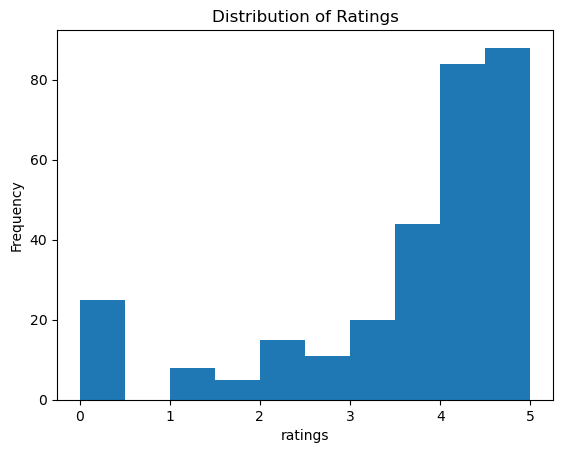

In [27]:
# 7. Ratings
# Check the distribution of ratings
ratings = books_df['ratings']
plt.hist(ratings)
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [28]:
# Get the unique author names
unique_authors = books_df['author'].unique()

# Count the number of unique author names
num_unique_authors = len(unique_authors)

# Print the number of unique author names
print("Number of unique authors:", num_unique_authors)

# Get the expected number of unique authors
expected_num_authors = 250

# Find the missing authors
missing_authors = set(range(1, expected_num_authors + 1)) - set(unique_authors)

# Print the missing authors
print("Missing authors:", missing_authors)


Number of unique authors: 297
Missing authors: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 

In [29]:
# Get the unique book titles
unique_titles = books_df['title'].unique()

# Get the unique author names
unique_authors = books_df['author'].unique()

# Find missing author names
missing_authors = set(unique_titles) - set(unique_authors)

# Print the missing author names
print("Books with missing author names:")
for book_title in missing_authors:
    print(book_title)

Books with missing author names:
 The Cyber Effect
Scam Me If You Can: Simple Strategies to Outsmart Today's Rip-off Artists
Someone Had To Do It
Data Science and Machine Learning: Mathematical and Statistical Methods (Chapman & Hall/CRC Machine Learning & Pattern Recognition)
Artificial Intelligence: A Modern Approach 3rd Edition
 Pattern Recognition and Machine Learning
Official Google Cloud Certified Professional Cloud Architect Study Guide
Fundamentals of Machine Learning for Predictive Data Analytics
DAWNLANDS (THE FAIRMILE, #3)
Learning from Data: A Short Course
The Hacker Playbook 3: Practical Guide to Penetration Testing
WHITE HORSE
Machine Learning for Dummies
Deep Learning on Graphs
Practice of Cloud System Administration, The: DevOps and SRE Practices for Web Services, Volume 2
A Dangerous Business
Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) (Adaptive Computation and Machine Learning series) second edition
Machine Learning and Human In

## retrieve the level with the highest ratings using the index attribute, and print it as the level with the most ratings.



In [30]:
# Group by level and calculate the sum of ratings for each level
level_ratings = books_df.groupby('levels')['ratings'].sum()

# Sort the results in descending order
level_ratings = level_ratings.sort_values(ascending=False)

# Get the level with the highest ratings
most_rated_level = level_ratings.index[0]

# Print the level with the highest ratings
print("Level with the most ratings:", most_rated_level)

Level with the most ratings: intermediate


# To perform EDA (Exploratory Data Analysis) for the highest level ratings, you can filter the dataset based on the highest-rated level and analyze various aspects of the data.

In [31]:
#Identify the level with the highest ratings:
highest_rated_level = level_ratings.index[0]

In [32]:
#Filter the dataset for the highest-rated level:
highest_level_data = books_df[books_df['levels'] == highest_rated_level]


In [33]:
#Explore the highest-rated level data:

#Print summary statistics:
print(highest_level_data.describe())

          ratings
count  105.000000
mean     3.902095
std      1.001897
min      0.000000
25%      3.800000
50%      4.100000
75%      4.500000
max      5.000000


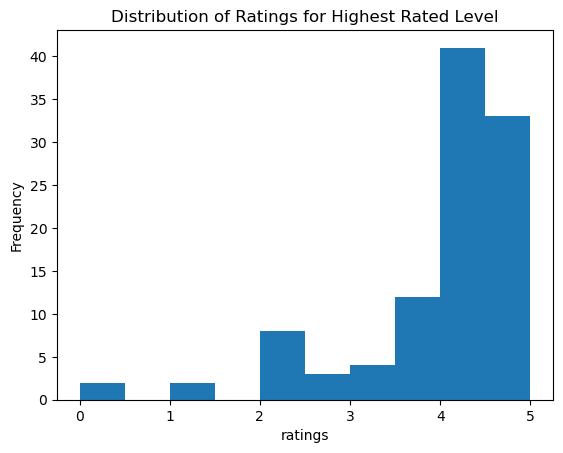

In [34]:
#Plot the distribution of ratings:
plt.hist(highest_level_data['ratings'])
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for Highest Rated Level')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


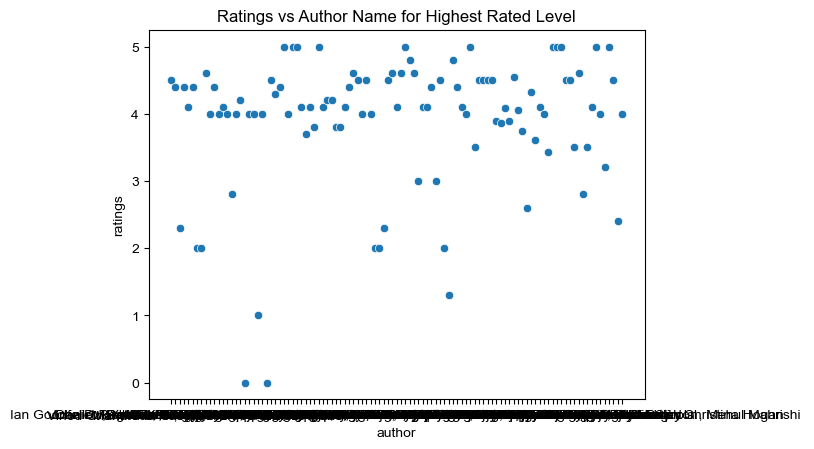

In [35]:
# Visualize the relationship between different variables:
import seaborn as sns
import matplotlib.font_manager as fm

# Set the font to a font that supports the required glyphs
font_path = fm.findfont(fm.FontProperties(family="Arial"))
plt.rcParams["font.family"] = fm.FontProperties(fname=font_path).get_name()

sns.scatterplot(data=highest_level_data, x='author', y='ratings')
plt.title('Ratings vs Author Name for Highest Rated Level')
plt.show()

In [36]:
# To find the name of the level that appears to have the highest rating in the plot, you can extract the level with 
#the highest mean rating from the DataFrame and display it as the title of the plot.

# Calculate the mean ratings for each level
books_df.groupby('levels')['ratings'].mean()

levels
advanced          3.560455
beginners         3.207000
inter-advanced    3.435294
intermediate      3.902095
Name: ratings, dtype: float64

In [37]:
# Calculate the mean ratings for each level
level_ratings = books_df.groupby('levels')['ratings'].mean()

In [38]:
# Find the level with the highest mean rating
level_ratings.idxmax()

'intermediate'

In [39]:
# Find the level with the highest mean rating
highest_rated_level = level_ratings.idxmax()

In [40]:
# Filter the dataset for the highest-rated level
books_df[books_df['levels'] == highest_rated_level]

,title,author,description,levels,image_url,ISBN,ratings,Genres
1,Deep Learning,"Ian Goodfellow, Yoshua Bengio, and Aaron Courv...","A comprehensive introduction to deep learning,...",intermediate,https://m.media-amazon.com/images/I/61qbj4Kwau...,262035618,4.5,AI
3,Neural Networks and Deep Learning,Michael Nielsen,Neural Networks and Deep Learning is a free on...,intermediate,https://coursesteach.com/pluginfile.php/4633/c...,1139495488,4.4,AI
7,Hands-On Machine Learning with Scikit-Learn an...,Aurélien Géron,A practical guide to machine learning using Py...,intermediate,https://m.media-amazon.com/images/I/51GcXOrWRO...,1492032646,2.3,AI
9,Introduction to Artificial Intelligence and Ex...,Dan W. Patterson,A comprehensive introduction to artificial int...,intermediate,https://m.media-amazon.com/images/I/417oWz7jjY...,134771001,4.4,AI
11,Artificial Intelligence Engines : A Tutorial I...,James V. Stone,"In this richly illustrated book, key neural ne...",intermediate,https://m.media-amazon.com/images/I/51TwZ+tYp7...,956372813,4.1,AI
...,...,...,...,...,...,...,...,...
279,Cloud Computing Bible,Sosinsky,The complete reference guide to the hot techno...,intermediate,https://m.media-amazon.com/images/I/51sswCH5tc...,470903562,3.2,Cloud Computing
283,Fundamentals of Data Engineering: Plan and Bui...,"Joe Reis, Matt Housley",Data engineering has grown rapidly in the past...,intermediate,https://m.media-amazon.com/images/I/41BCu6h1rW...,1098108302,5.0,Cloud Computing
287,The Kubernetes Book,Nigel Poulton,Kubernetes helps you deploy and manage contain...,intermediate,https://m.media-amazon.com/images/I/41NCL8Hdr5...,1521823634,4.5,Cloud Computing
290,AWS Certified Cloud Practitioner Study Guide: ...,"Ben Piper , David Clinton",Take the next step in your career by expanding...,intermediate,https://m.media-amazon.com/images/I/41vpOduhKo...,1119490707,2.4,Cloud Computing


In [41]:
# Filter the dataset for the highest-rated level
highest_level_data = books_df[books_df['levels'] == highest_rated_level]

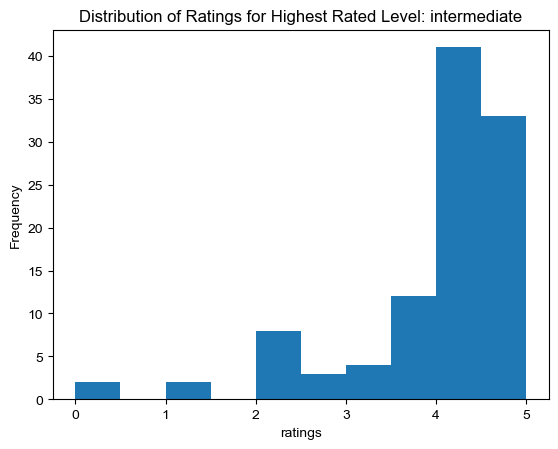

In [42]:
# Plot the distribution of ratings for the highest rated level
plt.hist(highest_level_data['ratings'])
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for Highest Rated Level: {}'.format(highest_rated_level))
plt.show()

In [43]:
 ## check which books received a rating of 0 along with their name , level and ISBN

In [44]:
books_df[books_df['ratings'] == 0]

,title,author,description,levels,image_url,ISBN,ratings,Genres
2,Artificial Intelligence: A Modern Approach 3rd...,Russell and Norvig,A shorter and more accessible introduction to ...,beginners,https://m.media-amazon.com/images/I/41HT2wMcAC...,136042597,0.0,AI
12,Artificial Intelligence: Foundations of Comput...,David L. Poole and Alan K. Mackworth,A rigorous introduction to artificial intellig...,advanced,https://m.media-amazon.com/images/I/51cWmPO2NB...,521519004,0.0,AI
14,Grokking Deep Reinforcement Learning 1st Edition,Miguel Morales,Grokking Deep Reinforcement Learning uses enga...,beginners,https://m.media-amazon.com/images/I/61KOxk3sEn...,1617295450,0.0,AI
25,Advances in Financial Machine Learning,Marcos Lopez de Prado,This book talks about how one can structure Bi...,advanced,https://m.media-amazon.com/images/I/51A6sUbwG2...,1119482089,0.0,AI
28,Architects of Intelligence: The truth about AI...,Martin Ford,This book grounded me on the essential dimensi...,beginners,https://m.media-amazon.com/images/I/416CY5lGam...,1789131510,0.0,AI
29,The Nature of Statistical Learning Theory,V. N. Vapnik,This book is a comprehensive introduction to s...,advanced,https://m.media-amazon.com/images/I/41KCOU0mKC...,387987800,0.0,AI
30,Foundations of Machine Learning((Adaptive Comp...,"Mehryar Mohri, Afshin Rostamizadeh, and Ameet...",This book is a comprehensive introduction to m...,advanced,https://m.media-amazon.com/images/I/41fqHpSJeq...,026201825X,0.0,AI
40,Introduction to Artificial Neural Networks,Kevin Gurney,This book is an introduction to artificial neu...,intermediate,https://m.media-amazon.com/images/I/4158Rhxfn+...,1857285034,0.0,AI
52,Practical Malware Analysis: The Hands-On Guide...,"Michael Sikorski, Andrew Honig","Malware analysis is big business, and attacks ...",beginners,https://m.media-amazon.com/images/I/51GY7SLYGF...,1593272901,0.0,Cyber Security
54,"Hacking: The Art of Exploitation, 2nd Edition",Jon Erickson,Hacking is the art of creative problem solving...,beginners,https://m.media-amazon.com/images/I/61WRz4V+AD...,1593271441,0.0,Cyber Security


In [45]:
zero_rating_books = books_df[books_df['ratings'] == 0]

In [46]:
zero_rating_books[['title', 'levels', 'ISBN']]

,title,levels,ISBN
2,Artificial Intelligence: A Modern Approach 3rd...,beginners,136042597
12,Artificial Intelligence: Foundations of Comput...,advanced,521519004
14,Grokking Deep Reinforcement Learning 1st Edition,beginners,1617295450
25,Advances in Financial Machine Learning,advanced,1119482089
28,Architects of Intelligence: The truth about AI...,beginners,1789131510
29,The Nature of Statistical Learning Theory,advanced,387987800
30,Foundations of Machine Learning((Adaptive Comp...,advanced,026201825X
40,Introduction to Artificial Neural Networks,intermediate,1857285034
52,Practical Malware Analysis: The Hands-On Guide...,beginners,1593272901
54,"Hacking: The Art of Exploitation, 2nd Edition",beginners,1593271441


In [47]:
zero_rating_books.shape

(25, 8)

In [48]:
zero_rating_books_info = zero_rating_books[['title', 'levels','ISBN']]

In [49]:
zero_rating_books_info.head(24)

,title,levels,ISBN
2,Artificial Intelligence: A Modern Approach 3rd...,beginners,136042597
12,Artificial Intelligence: Foundations of Comput...,advanced,521519004
14,Grokking Deep Reinforcement Learning 1st Edition,beginners,1617295450
25,Advances in Financial Machine Learning,advanced,1119482089
28,Architects of Intelligence: The truth about AI...,beginners,1789131510
29,The Nature of Statistical Learning Theory,advanced,387987800
30,Foundations of Machine Learning((Adaptive Comp...,advanced,026201825X
40,Introduction to Artificial Neural Networks,intermediate,1857285034
52,Practical Malware Analysis: The Hands-On Guide...,beginners,1593272901
54,"Hacking: The Art of Exploitation, 2nd Edition",beginners,1593271441


## Now perform popularity-based algorithm

In [50]:
#To apply a popularity algorithm on the books dataset, you can use the rating data to determine the popularity of books based on the average ratings they receive.

In [51]:
# Calculate the average ratings for each book
books_df.groupby('title')['ratings'].mean()

title
 Algorithms of Oppression: How Search Engines Reinforce Racism                                                           4.50
 An Introduction to Statistical Learning                                                                                 3.50
 Data Science for Beginners                                                                                              3.90
 Hacking Exposed 7: Network Security Secrets and Solutions                                                               5.00
 Hacking: A Beginners Guide to Computer Hacking, Basic Security, And Penetration Testing                                3.80
                                                                                                                         ... 
WHITE HORSE                                                                                                              3.65
WINTERLAND                                                                                                      

In [52]:
books_df.groupby('title')['ratings'].mean().reset_index()

,title,ratings
0,Algorithms of Oppression: How Search Engines ...,4.50
1,An Introduction to Statistical Learning,3.50
2,Data Science for Beginners,3.90
3,Hacking Exposed 7: Network Security Secrets a...,5.00
4,Hacking: A Beginners Guide to Computer Hacki...,3.80
...,...,...
294,WHITE HORSE,3.65
295,WINTERLAND,3.98
296,Weapons of Math Destruction: How Big Data Incr...,4.30
297,You Look Like a Thing and I Love You: How Arti...,2.60


In [53]:
# Calculate the average ratings for each book
book_ratings = books_df.groupby('title')['ratings'].mean().reset_index()

In [54]:
# Sort the books based on average ratings in descending order
popular_books = book_ratings.sort_values('ratings', ascending=False)

In [55]:
# Print the top 10 popular books
print("Top 30 popular books:")
popular_books.head(30)

Top 30 popular books:


,title,ratings
215,"Python Data Analytics: With Pandas, NumPy, and...",5.00
256,The Beach House (South Carolina Sunsets),5.00
140,Fundamentals of Data Engineering: Plan and Bui...,5.00
56,Bridging the AI Gap: Why some leaders create i...,5.00
126,Designing Data-Intensive Applications: The Big...,5.00
158,Introducing HR Analytics with Machine Learning...,5.00
80,Cloud Computing for Science and Engineering,5.00
187,Messing with the Enemy: Surviving in a Social ...,5.00
27,Advanced Machine Learning with Python: Solve d...,5.00
212,Practicing Trustworthy Machine Learning: Consi...,5.00


## Recommendation 

In [56]:
pip install surprise

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


users_df = pd.read_csv('data/users.csv', encoding='latin-1')

# Combine relevant columns from books and users datasets
books_df['Features'] = books_df['Genres'] + ' ' + books_df['author']
users_df['Features'] = users_df['Genres'] + ' ' + users_df['Author-Name'] + ' ' + users_df['Preferred Topics']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the TF-IDF vectors for books and users
books_tfidf_matrix = tfidf_vectorizer.fit_transform(books_df['Features'])
users_tfidf_matrix = tfidf_vectorizer.transform(users_df['Features'])

# Compute the cosine similarity between books and users
cosine_sim = linear_kernel(users_tfidf_matrix, books_tfidf_matrix)

# Define a function to get personalized recommendations for each user
def get_recommendations(user_name, num_recommendations=10):
    user_idx = users_df[users_df['User-ID'] == user_name].index[0]
    sim_scores = list(enumerate(cosine_sim[user_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]
    book_indices = [i[0] for i in sim_scores]
    return books_df.iloc[book_indices]

# Get recommendations for a specific user
user_name = 'user3'  # Replace with the desired user name
recommendations = get_recommendations(user_name)
print(f"Book recommendations for user {user_name}:")
for idx, row in recommendations.iterrows():
    print(f"- {row['title']} by {row['author']}")


Book recommendations for user user3:
- Official Google Cloud Certified Professional Cloud Architect Study Guide by  Dan Sullivan
- Cloud Computing: Theory and Practice by  Dan C. Marinescu
- Deep Learning: A Practitioner's Approach 1st Edition by Josh Patterson, Adam Gibson
-  Information Theory, Inference, and Learning Algorithms by David J.C. MacKay
-  Pattern Recognition and Machine Learning by Christopher M. Bishop
- Advanced Machine Learning with Python: Solve data science problems by mastering cutting-edge machine learning techniques in Python  by John Hearty
- Applied Predictive Modeling by Max Kuhn
- Machine Learning in Action by Peter Harrington
- The Alignment Problem: Machine Learning and Human Values  by Brian Christian 
- Machine Learning: A Probabilistic Perspective by Kevin P. Murphy
